## Shots Taken Heat Map

This notebook walks the user through the creation of the Shots Taken Heat Map.  The goal of this visualization is inform the user where, in relation to the goal, shots landed.  The user should be able to quickly understand the information after viewing for a few seconds so that they may return their attention to the game.

Imagine, your team just missed the game winning shot AGAIN!  And it feels like they can't seem to get the goal in the net.  This visualization quickly informs you where they shots are failing or succeeding.  You view for a few seconds but your attention goes back to the game before the goalie does the goal kick.

The 2015 Women's World Cup Final game is used in this notebook

In [36]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline 

In [37]:
WWC = pd.read_csv('usa-japan.csv')
WWC["SecInGame"]=WWC['period_min']*60+WWC['period_second']
WWC.sort('SecInGame', inplace=True)

In [38]:
Home = int(WWC['home_team'].unique()[0][1:])
Away = int(WWC['away_team'].unique()[0][1:])

TeamName={Home:WWC[WWC['team_id']==Home]['team'].unique()[0],
         Away:WWC[WWC['team_id']==Away]['team'].unique()[0]}

We will start by building the visualization assuming the game has already been played.  Focus on the Home Team 

In [39]:
box={
    'left':{'point':(35,0),'x_length':5.7,'y_length':40},
    'right':{'point':(59.3,0),'x_length':5.7,'y_length':40},
    'high':{'point':(44.2,60),'x_length':11.6,'y_length':40},
    'close_left':{'point':(40.7,0),'x_length':3.5,'y_length':40},
    'close_right':{'point':(55.8,0),'x_length':3.5,'y_length':40},
    'close_high':{'point':(44.2,42),'x_length':11.6,'y_length':18},
    'close_left_and_high':{'point':(40.7,40),'x_length':3.5,'y_length':20},
    'close_right_and_high':{'point':(55.8,40),'x_length':3.5,'y_length':20},
    
    'high_left':[
        {'point':(35,60),'x_length':5.7,'y_length':40},
        {'point':(35,40),'x_length':5.7,'y_length':20},
        {'point':(40.7,60),'x_length':3.5,'y_length':40}],
    'high_right':[
        {'point':(59.3,60),'x_length':5.7,'y_length':40},
        {'point':(59.3,40),'x_length':5.7,'y_length':20},
        {'point':(55.8,60),'x_length':3.5,'y_length':40}],
    
    'low_left':{'point':(45.2,0),'x_length':3,'y_length':20},
    'high_left':{'point':(45.2,20),'x_length':3,'y_length':18},
    'low_centre':{'point':(48.2,0),'x_length':3.6,'y_length':20},
    'high_centre':{'point':(48.2,20),'x_length':3.6,'y_length':18},
    'low_right':{'point':(51.8,0),'x_length':3,'y_length':20},
    'high_right':{'point':(51.8,20),'x_length':3,'y_length':18},
    
    'six_yard_blocked':{'point':(45,-20),'x_length':10,'y_length':10},
    'blocked':{'point':(40,-40),'x_length':20,'y_length':10}
}

post={
    'left':{'point':(44.2,0),'x_length':1,'y_length':38},
    'right':{'point':(54.8,0),'x_length':1,'y_length':38},
    'top':{'point':(44.2,38),'x_length':11.6,'y_length':4}
}

Col=['left','high','right','low_left','high_left','low_centre','high_centre','low_right',
    'high_right','blocked','close_left','close_high','close_left_and_high','close_right_and_high',
    'six_yard_blocked']

Annotate={'six_yard_blocked':'Shot Blocked','blocked':'Shot From >6 yards Blocked'}

In [40]:
Values=WWC[((WWC['event_type_id']==13)|(WWC['event_type_id']==15)|(WWC['event_type_id']==16))
          & (WWC['team_id']==Home)][Col].sum()
MaxValue=Values.max()

cNorm  = colors.Normalize(vmin=0, vmax=MaxValue)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='YlOrBr')

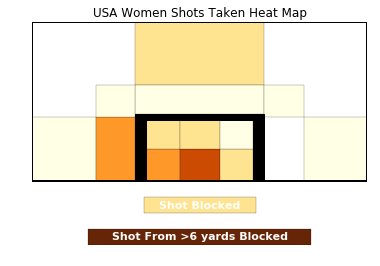

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)


for c in Col:
    colorVal=scalarMap.to_rgba(Values[c])
    if isinstance(box[c],dict):
        rect=matplotlib.patches.Rectangle(box[c]['point'],box[c]['x_length'],box[c]['y_length'],color=colorVal,ec='k',lw=.2)
        ax.add_patch(rect)
        if c in ['blocked', 'six_yard_blocked']:
            x=box[c]['point'][0]+box[c]['x_length']/2
            y=box[c]['point'][1]+box[c]['y_length']/2
            ax.annotate(Annotate[c], (x, y), color='w', weight='bold', fontsize=11, ha='center', va='center')
            
    else:
        for rec in box[b]:
            rect=matplotlib.patches.Rectangle(rec['point'],rec['x_length'],rec['y_length'],color=colorVal)
            ax.add_patch(rect)
    
for p in post.keys():
    rect=matplotlib.patches.Rectangle(post[p]['point'],post[p]['x_length'],post[p]['y_length'],color='k')
    ax.add_patch(rect)
    


plt.plot([35,35,65,65,35],[0,100,100,0,0],c='k',linewidth=2)
plt.title(TeamName[Home]+' Shots Taken Heat Map')
plt.axis('off')
plt.show()

## "Mock up of Streaming"

This is a mock-up of how the visualization would appear if streaming along with the game in our Fan Experience Broadcast

In [42]:
def Shot_Heat_Map(Values,teamChoice):
    MaxValue=Values.max()
    cNorm  = colors.Normalize(vmin=0, vmax=MaxValue)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='YlOrBr')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for c in Col:
        colorVal=scalarMap.to_rgba(Values[c])
        if isinstance(box[c],dict):
            rect=matplotlib.patches.Rectangle(box[c]['point'],box[c]['x_length'],box[c]['y_length'],color=colorVal,ec='k',lw=.2)
            ax.add_patch(rect)
            if c in ['blocked', 'six_yard_blocked']:
                x=box[c]['point'][0]+box[c]['x_length']/2
                y=box[c]['point'][1]+box[c]['y_length']/2
                ax.annotate(Annotate[c], (x, y), color='k', weight='bold', fontsize=11, ha='center', va='center')

        else:
            for rec in box[b]:
                rect=matplotlib.patches.Rectangle(rec['point'],rec['x_length'],rec['y_length'],color=colorVal)
                ax.add_patch(rect)

    for p in post.keys():
        rect=matplotlib.patches.Rectangle(post[p]['point'],post[p]['x_length'],post[p]['y_length'],color='k')
        ax.add_patch(rect)

    plt.plot([35,35,65,65,35],[0,100,100,0,0],c='k',linewidth=2)
    plt.title(TeamName[teamChoice]+' Shots Taken Heat Map')
    plt.axis('off')
    plt.show()
    
def Update_chart(currentGameTime,teamChoice):
    currentGameTimeSeconds=currentGameTime*60
    Values=WWC[((WWC['event_type_id']==13)|(WWC['event_type_id']==15)|(WWC['event_type_id']==16))
              & (WWC['SecInGame']<currentGameTimeSeconds) & (WWC['team_id']==teamChoice)][Col].sum()
    Shot_Heat_Map(Values,teamChoice)

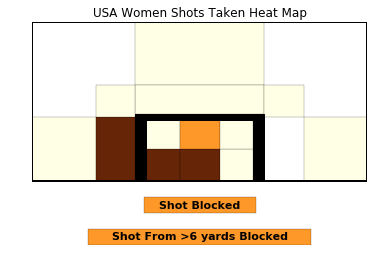

In [43]:
## variable input
currentGameTime = 30 #minutes
teamChoice = Home

Update_chart(currentGameTime,teamChoice)

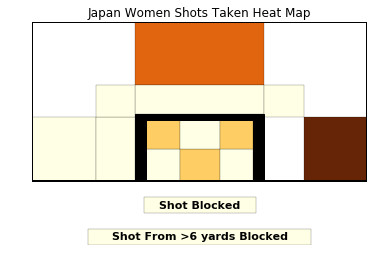

In [44]:
## variable input
currentGameTime = 80 #minutes
teamChoice=Away

Update_chart(currentGameTime, teamChoice)

**Unfinished Work:**
Visualizations should include the colormap for reference.  Since the total number of shots taken changes as the game progresses, the colormap will also change.  Thus it is very important to include the colormap reference in each visualization.  Unfortunately, the team ran out of time and could not add this necessary feature to the visualization